In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.metrics import Precision, Recall, AUC
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [2]:
data = pd.read_excel('/Users/Jide_1/Springboard/default of credit card clients.xls', header=1)


In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data = data.drop('ID', axis=1)

In [5]:
data.shape

(30000, 24)

In [6]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
data.rename(columns={'default payment next month': 'default'}, inplace=True)

In [8]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
features = [i for i in data.columns if i != 'default']
target = ['default']

In [10]:
X = data[features].values
y = data[target].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, stratify=y)

In [77]:
from sklearn.decomposition import PCA

In [78]:
scaler = StandardScaler()
X_train_std_fit = scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


In [79]:
pca = PCA(n_components=15).fit(X_train_std)
x_pca_train = pca.transform(X_train_std)
x_pca_test = pca.transform(X_test_std)


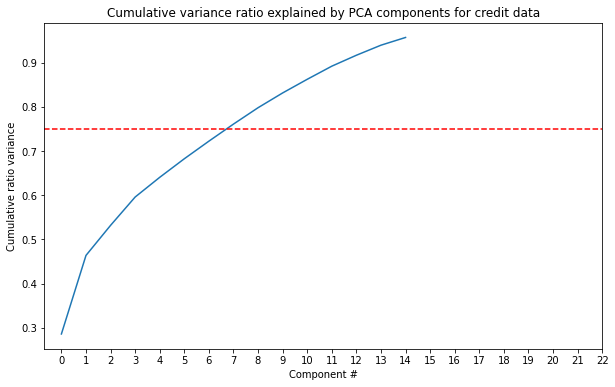

In [80]:
num = list(range(23))
plt.subplots(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.xticks(np.arange(min(num), max(num)+1, 1.0))
plt.axhline(y=.75, linestyle='--', color='red')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for credit data');

In [81]:
x_pca_train.shape

(24000, 15)

In [82]:
x_pca_test.shape

(6000, 15)

In [83]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [84]:
model = Sequential()
model.add(Dense(300, activation='sigmoid', input_shape = (15,)))
model.add(Dense(200, activation='tanh'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[AUC()])

In [85]:
results = model.fit(x_pca_train, y_train, validation_data=(x_pca_test, y_test), epochs=30, batch_size=128)

Train on 24000 samples, validate on 6000 samples
Epoch 1/30
24000/24000 [==============================] - 4s 167us/step - loss: 0.4857 - auc_11: 0.8386 - val_loss: 0.4520 - val_auc_11: 0.8587
Epoch 2/30
24000/24000 [==============================] - 3s 127us/step - loss: 0.4542 - auc_11: 0.8591 - val_loss: 0.4465 - val_auc_11: 0.8697
Epoch 3/30
24000/24000 [==============================] - 3s 129us/step - loss: 0.4503 - auc_11: 0.8647 - val_loss: 0.4468 - val_auc_11: 0.8710
Epoch 4/30
24000/24000 [==============================] - 3s 129us/step - loss: 0.4463 - auc_11: 0.8687 - val_loss: 0.4413 - val_auc_11: 0.8727
Epoch 5/30
24000/24000 [==============================] - 3s 118us/step - loss: 0.4456 - auc_11: 0.8697 - val_loss: 0.4474 - val_auc_11: 0.8706
Epoch 6/30
24000/24000 [==============================] - 3s 118us/step - loss: 0.4441 - auc_11: 0.8712 - val_loss: 0.4398 - val_auc_11: 0.8744
Epoch 7/30
24000/24000 [==============================] - 3s 123us/step - loss: 0.4434 

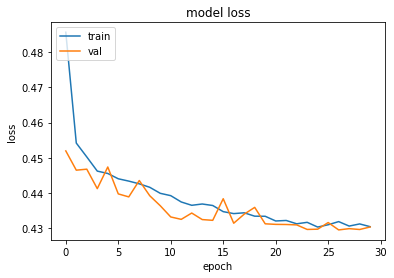

In [86]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

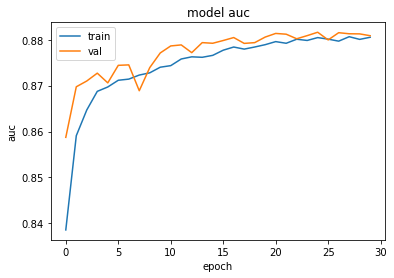

In [87]:
plt.plot(results.history['auc_11'])
plt.plot(results.history['val_auc_11'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()